In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [7]:
df=pd.read_csv('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
df.shape

(520, 17)

Positive    320
Negative    200
Name: class, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


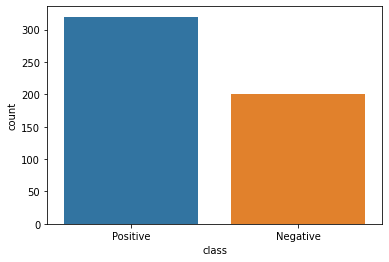

In [15]:
print(df['class'].value_counts())
sns.countplot(df['class'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


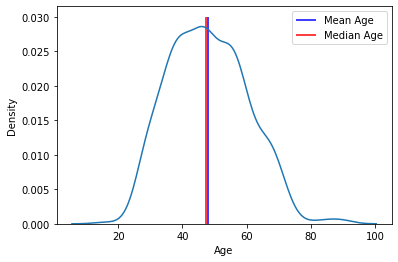

In [13]:
sns.distplot(df['Age'],hist=False)
plt.vlines(df['Age'].mean(),0,0.03,label='Mean Age',colors='b')
plt.vlines(df['Age'].median(),0,0.03,label='Median Age',colors='r')
plt.legend()
plt.show()

Count plots of categorical features:


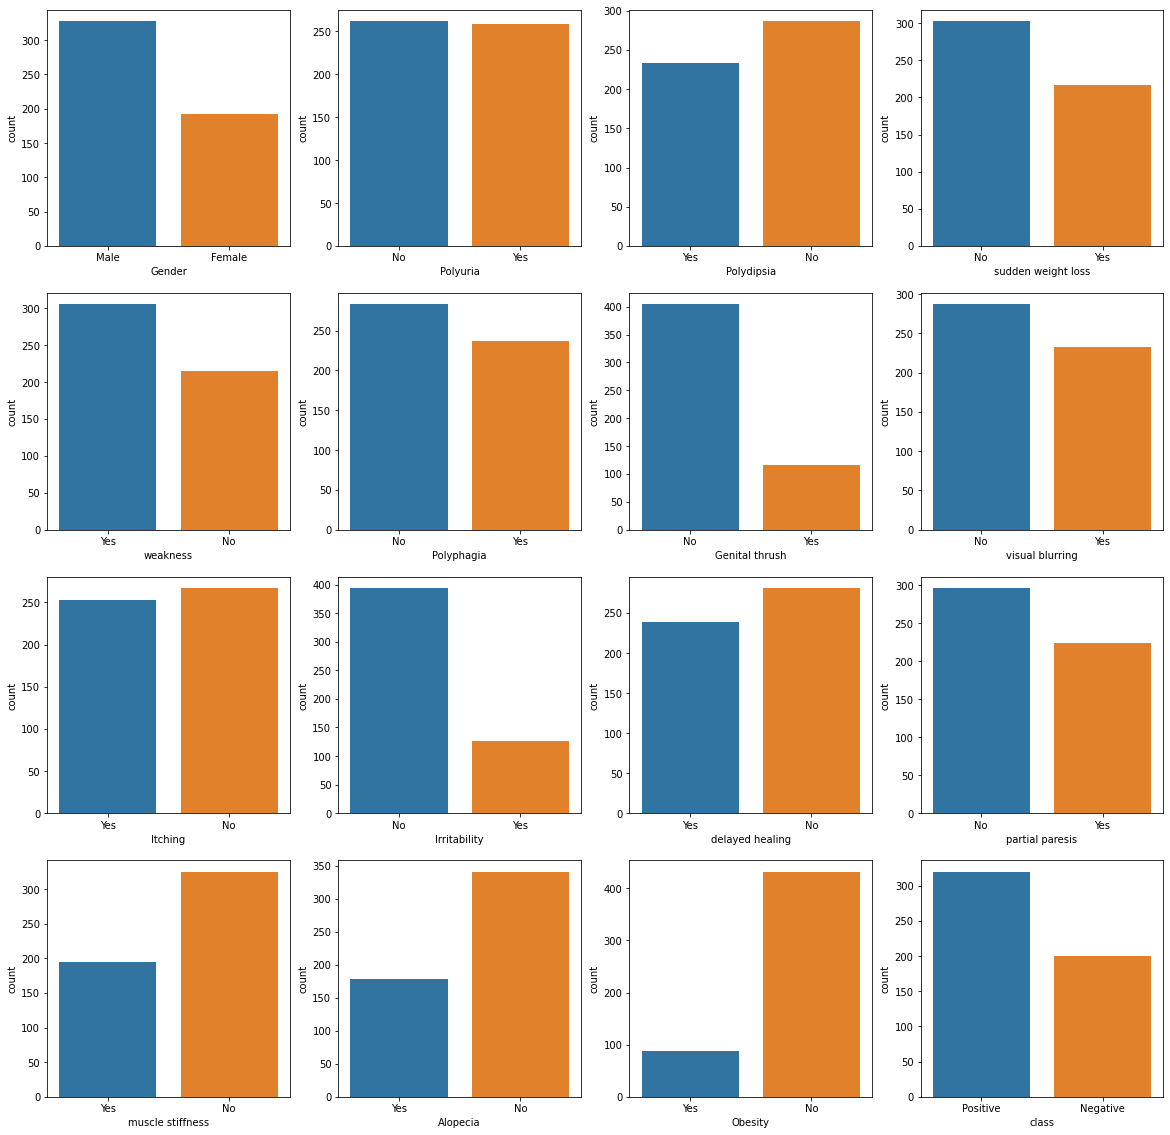

In [21]:
fig,axs=plt.subplots(4,4,figsize=(20,20))
count=1
for i in range(4):
  for j in range(4):
    sns.countplot(df[df.columns[count]],ax=axs[i][j])
    count+=1
print('Count plots of categorical features:')
plt.show()

In [22]:
import scipy.stats as stats

In [37]:
def perform_chi2cont(x_feature):
  ct=pd.crosstab(df['class'],df[x_feature])
  chi2stat,pval,dof,exp_f=stats.chi2_contingency(ct)
  return pval
def perform_ttest(x_feature):
  positive_data=df[df['class']=='Positive'][x_feature]
  neagtive_data=df[df['class']=='Negative'][x_feature]
  stat,pval=stats.ttest_ind(positive_data,neagtive_data)
  return pval

In [38]:
x_features=[i for i in df.columns if i!='Age' and i!='class']
pvals=[perform_chi2cont(i) for i in x_features]
print('Statistical significance of categorical independent features:')
pd.DataFrame(np.array(pvals).T,index=x_features,columns=['P Values']).sort_values('P Values')

Statistical significance of categorical independent features:


,P Values
Polyuria,1.740912e-51
Polydipsia,6.187010e-49
Gender,3.289704e-24
sudden weight loss,5.969166e-23
partial paresis,1.565289e-22
Polyphagia,1.165158e-14
Irritability,1.771483e-11
Alopecia,1.909279e-09
visual blurring,1.701504e-08
weakness,4.869843e-08


In [39]:
print('Statistical Significance of numerical independant feature:')
print('Age: ',perform_ttest('Age'))

Statistical Significance of numerical independant feature:
Age:  0.013151253540112713


In [8]:
x=pd.get_dummies(df.drop('class',1),drop_first=True,prefix_sep='_is_')
y=df['class'].replace({'Positive':1,'Negative':0})

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
sm=SMOTE(random_state=0)
xres,yres=sm.fit_resample(x,y)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(xres,yres,random_state=0,train_size=0.8)

In [20]:
import sklearn.metrics as skm

In [16]:
def model_fitting(model_name,model):
  fit_model=model.fit(xtrain,ytrain)
  print('Model Name:',model_name)
  print('Train Score:',skm.accuracy_score(ytrain,fit_model.predict(xtrain)))
  print('Test Score:',skm.accuracy_score(ytest,fit_model.predict(xtest)))
  print(skm.confusion_matrix(ytest,fit_model.predict(xtest)))
  print(skm.classification_report(ytest,fit_model.predict(xtest)))

In [17]:
from sklearn.linear_model import LogisticRegressionCV

In [59]:
log_reg=LogisticRegressionCV(scoring='f1_weighted',random_state=0,n_jobs=-1,verbose=1,)
model_fitting('Logistic Regression CV',log_reg)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Model Name: Logistic Regression CV
Train Score: 0.94140625
Test Score: 0.8984375
[[58  6]
 [ 7 57]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.90      0.89      0.90        64

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gnb=GaussianNB()
model_fitting('Naive Bayes',gnb)

Model Name: Naive Bayes
Train Score: 0.896484375
Test Score: 0.8984375
[[56  8]
 [ 5 59]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        64
           1       0.88      0.92      0.90        64

    accuracy                           0.90       128
   macro avg       0.90      0.90      0.90       128
weighted avg       0.90      0.90      0.90       128



In [62]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt=DecisionTreeClassifier()
model_fitting('Decision Tree',dt)

Model Name: Decision Tree
Train Score: 1.0
Test Score: 0.9375
[[64  0]
 [ 8 56]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        64
           1       1.00      0.88      0.93        64

    accuracy                           0.94       128
   macro avg       0.94      0.94      0.94       128
weighted avg       0.94      0.94      0.94       128



In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf=RandomForestClassifier()
model_fitting('Random Forest',rf)

Model Name: Random Forest
Train Score: 1.0
Test Score: 0.9765625
[[64  0]
 [ 3 61]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.95      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
ab=AdaBoostClassifier()
model_fitting('Ada Boost',ab)

Model Name: Ada Boost
Train Score: 0.958984375
Test Score: 0.90625
[[59  5]
 [ 7 57]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        64
           1       0.92      0.89      0.90        64

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128



In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [21]:
gb=GradientBoostingClassifier()
model_fitting('Gradient Boost',gb)

Model Name: Gradient Boost
Train Score: 0.998046875
Test Score: 0.9765625
[[63  1]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.98      0.97      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [2]:
from xgboost import XGBClassifier

In [72]:
xgb=XGBClassifier()
model_fitting('XGBoost',xgb)

Model Name: XGBoost
Train Score: 0.99609375
Test Score: 0.9765625
[[63  1]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.98      0.97      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [15]:
import pickle

In [77]:
pickle.dump(xgb,open('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/XGBoost_diabetes','wb'))

In [81]:
xgb.save_model('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/XGBoost_diabetes1')

In [23]:
pickle.dump(gb,open('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/GBoost_Diabetes.pkl','wb'))

In [24]:
gbb=pickle.load(open('/content/drive/My Drive/Python files/Own Projects/Diabetes Prediction/GBoost_Diabetes.pkl','rb'))

In [25]:
gbb.predict(xtest)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
pickle.load